In [71]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


In [72]:
data=pd.read_csv("bank-additional-full.csv")
pd.options.display.max_columns = 2000

##### imputation 

In [73]:
# compute "unknowen" to most freq in (Education, housing, marital,job, loan)
# delete level(yes) in (default)
from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(missing_values='unknown',strategy="most_frequent")

data['imputed_marital'] = imp_freq.fit_transform(data['marital'].values.reshape(-1, 1))
data = data.drop(['marital'],axis=1)
data['imputed_education'] = imp_freq.fit_transform(data['education'].values.reshape(-1, 1))
data = data.drop(['education'],axis=1)
data['imputed_housing'] = imp_freq.fit_transform(data['housing'].values.reshape(-1, 1))
data = data.drop(['housing'],axis=1)
data['imputed_job'] = imp_freq.fit_transform(data['job'].values.reshape(-1, 1))
data = data.drop(['job'],axis=1)
data['imputed_loan'] = imp_freq.fit_transform(data['loan'].values.reshape(-1, 1))
data = data.drop(['loan'],axis=1)
#delete three observations with response default value = yes
#Create a new dataframe called data that 
data=data[data.default != 'yes']


In [74]:
data.head()

,age,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,imputed_marital,imputed_education,imputed_housing,imputed_job,imputed_loan
0,56,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,married,basic.4y,no,housemaid,no
1,57,unknown,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,married,high.school,no,services,no
2,37,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,married,high.school,yes,services,no
3,40,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,married,basic.6y,no,admin.,no
4,56,no,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,married,high.school,no,services,yes


In [75]:
data.shape

(41185, 21)

In [52]:
#categorical_var = data.select_dtypes(include=['object']).copy()

In [79]:
#Lable Encoder
# Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. 
# LabelEncoder encode labels with value between 0 and n_classes-1

le = preprocessing.LabelEncoder()
        
data.pdays = le.fit_transform(data.pdays)
data.default = le.fit_transform(data.default)               
data.day_of_week = le.fit_transform(data.day_of_week)         
data.month = le.fit_transform(data.month)     
data.contact = le.fit_transform(data.contact)
data.duration = le.fit_transform(data.duration)        
data.imputed_job = le.fit_transform(data.imputed_job)
data.imputed_marital = le.fit_transform(data.imputed_marital)
data.imputed_education = le.fit_transform(data.imputed_education)
data.imputed_housing = le.fit_transform(data.imputed_housing)
data.imputed_loan = le.fit_transform(data.imputed_loan)
data.poutcome = le.fit_transform(data.poutcome)
data.y = le.fit_transform(data.y)

In [80]:
data.head()

,age,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,imputed_marital,imputed_education,imputed_housing,imputed_job,imputed_loan
0,56,0,1,6,1,261,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,3,0
1,57,1,1,6,1,149,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,3,0,7,0
2,37,0,1,6,1,226,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,3,1,7,0
3,40,0,1,6,1,151,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0
4,56,0,1,6,1,307,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,3,0,7,1


In [130]:
cols_input =['age', 'default','contact','month','day_of_week','duration', 'campaign', 'pdays', 'previous',
            'poutcome' ,'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
            'imputed_marital',	'imputed_education',	'imputed_housing',	'imputed_job',	'imputed_loan']

In [81]:
y=data['y']
x=data.drop(['y'], axis=1)

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
duration,0.343415
pdays,0.175877
nr.employed,0.099908
emp.var.rate,0.095759
euribor3m,0.065156


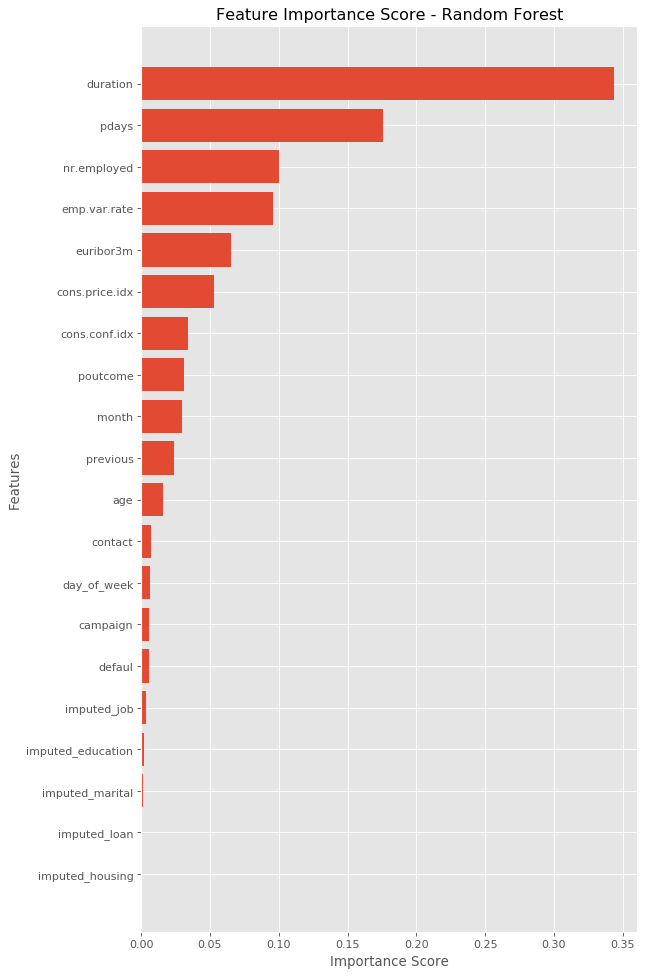

In [87]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In [138]:
new_y=data['y']

new_x=data.drop(['y','default',
            #'imputed_marital',	
                # 'imputed_education',
                 'imputed_housing',	
                 #'imputed_job',
                 'imputed_loan'], axis=1)

In [139]:
new_x.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,imputed_marital,imputed_education,imputed_job
0,56,1,6,1,261,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,3
1,57,1,6,1,149,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,1,3,7
2,37,1,6,1,226,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,1,3,7
3,40,1,6,1,151,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,1,1,0
4,56,1,6,1,307,1,26,0,1,1.1,93.994,-36.4,4.857,5191.0,1,3,7


In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size = 0.2, random_state = 0)

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 100,random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [142]:
pred = rf.predict(x_test)

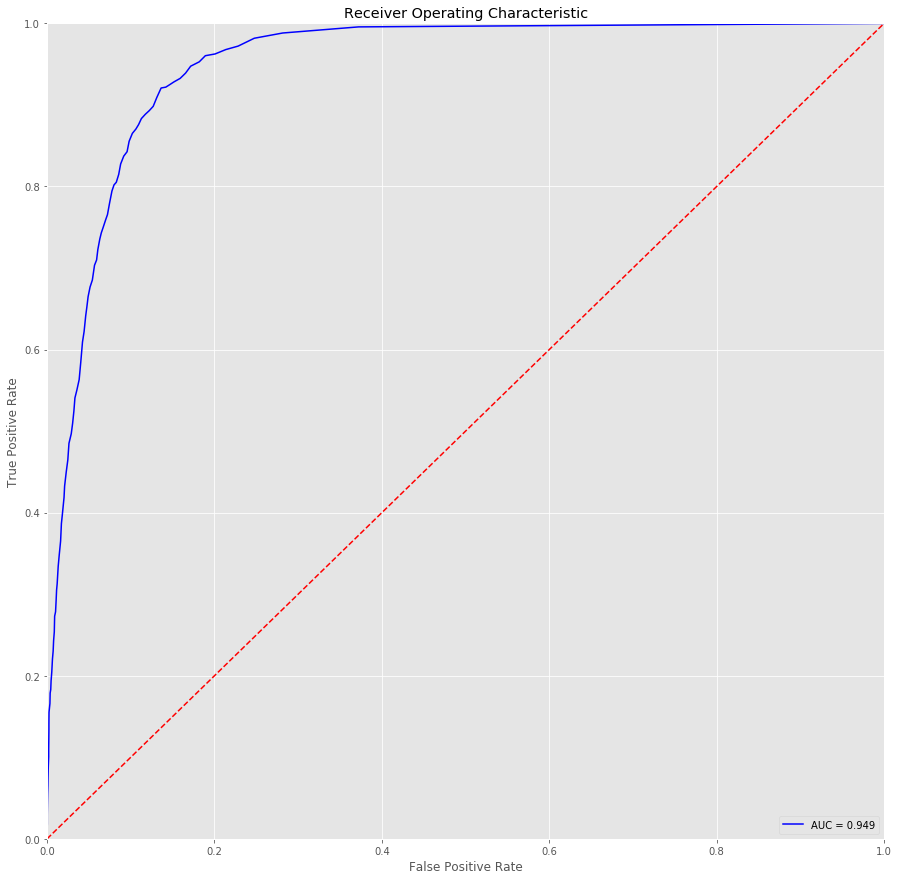

In [143]:
from sklearn.metrics import roc_curve, auc

y_pred_sample_score = rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()